# **Practical Time Series Forecasting with R**
## Chapter 2: Time Series Data

In [5]:
## ESTABLISH ENVIRONMENT
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pathlib import Path

def convert_date(date_str):
    # if the string is 'nan' (which can occur if there was a NaN entry in the original data)
    if date_str == 'nan':
        return None
    # try to parse the date assuming it's in the format 'Dec-00'
    try:
        date = datetime.strptime(date_str, '%b-%y')
        if date.year > datetime.now().year:
            date = date.replace(year=date.year-100) # replace century if needed
    except ValueError:
        # if that fails, assume it's in the format '1-Dec'
        try:
            date = datetime.strptime(date_str, '%d-%b')
            # assuming all dates are in 2000s
            date = date.replace(year=2000 + int(date_str.split('-')[0]))
        except ValueError:
            # if both formats fail, return None or handle as you see fit
            return None
    # convert the date into the desired format
    return date.strftime('%B %Y')

# Read Data
Data_Repo = Path("/Users/[Insert Path to Data]/")
Amtrak_data = pd.read_csv(Data_Repo / "Amtrak data.csv", skipfooter=96, skip_blank_lines=True, comment='#', engine='python')

# Convert the 'Month' column to string type
Amtrak_data['Month'] = Amtrak_data['Month'].astype(str)

# Apply the date conversion function to the 'Month' column
Amtrak_data['Month'] = Amtrak_data['Month'].apply(convert_date)


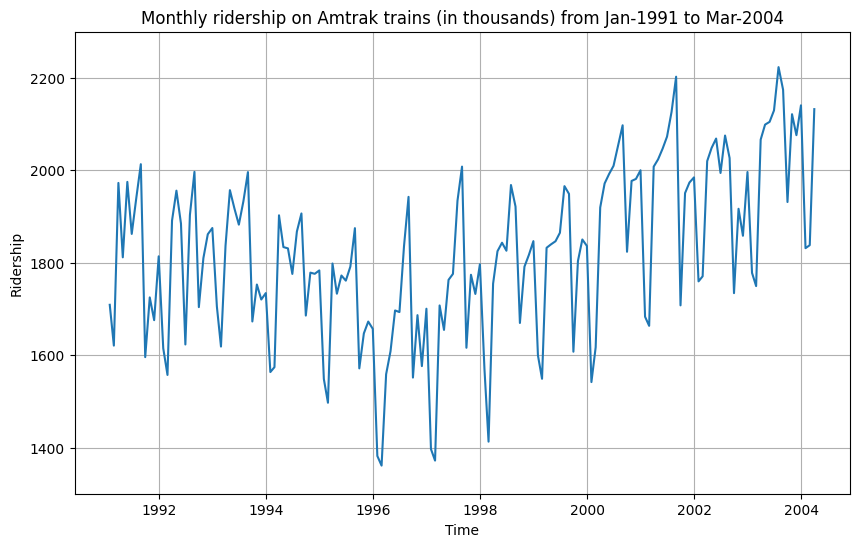

In [2]:
## FIGURE 2.2: Monthly ridership on Amtrak trains (in thousands) from Jan-1991 to Mar-2004
ridership_ts = pd.Series(Amtrak_data['Ridership'].values,
                         index=pd.date_range('1991-01', periods=len(Amtrak_data), freq = 'M'))

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(ridership_ts, label = 'Ridership')
plt.title('Monthly ridership on Amtrak trains (in thousands) from Jan-1991 to Mar-2004')
plt.xlabel('Time')
plt.ylabel('Ridership')
plt.ylim(1300,2300)
plt.grid(True)
plt.show()

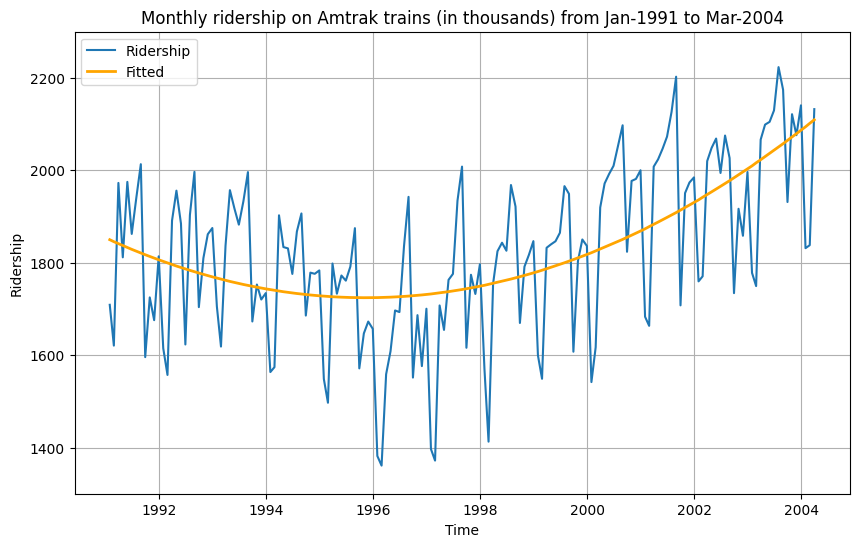

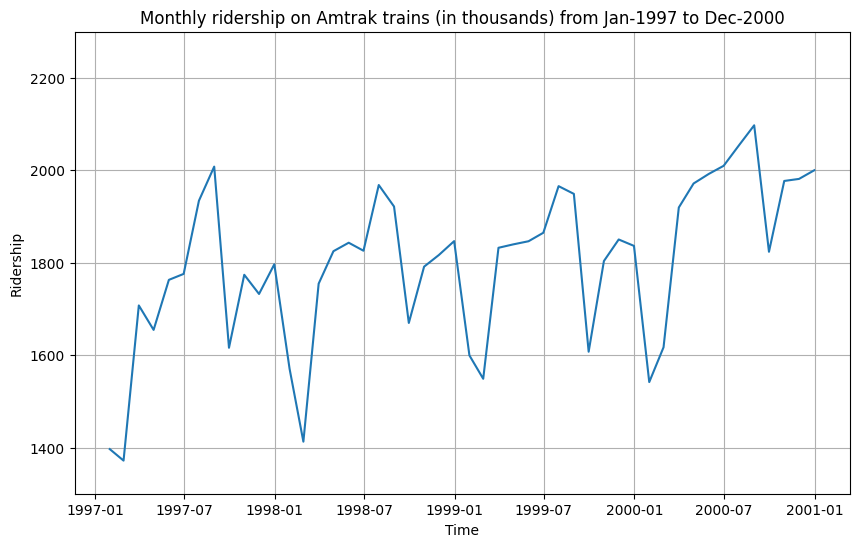

In [3]:
## FIGURE 2.4: Plots that enhance the different components of the time series
# Fit a linear regression model with trend and trend^2
X = np.arange(len(ridership_ts)) ##(ridership_ts.index - ridership_ts.index[0]).days
X = sm.add_constant(np.column_stack((X, X**2)))
model = sm.OLS(ridership_ts, X)
results = model.fit() ## print(results.summary()) ##model.fit(method='pinv')

# Plot the original data and fitted values
plt.figure(figsize=(10,6))
plt.plot(ridership_ts, label='Ridership')
plt.plot(ridership_ts.index, results.fittedvalues, color='orange', label='Fitted', linewidth=2)

plt.title('Monthly ridership on Amtrak trains (in thousands) from Jan-1991 to Mar-2004')
plt.xlabel('Time')
plt.ylabel('Ridership')
plt.ylim(1300,2300)
plt.grid(True)
plt.legend()
plt.show()

# Zoom in to specific period
zoomed_ts = ridership_ts['1997':'2000']
plt.figure(figsize=(10,6))
plt.plot(zoomed_ts, label='Ridership')
plt.title('Monthly ridership on Amtrak trains (in thousands) from Jan-1997 to Dec-2000')
plt.xlabel('Time')
plt.ylabel('Ridership')
plt.ylim(1300,2300)
plt.grid(True)
plt.show()
